In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
loan_master = pd.read_csv("loan_master.csv")

print("Dataset shape:", loan_master.shape)
loan_master.head()


Dataset shape: (100000, 27)


,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,...,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,revolvingBalance,revolvingUtilizationRate,numDerogatoryRec,numDelinquency2Years,numChargeoff1year,numInquiries6Mon
0,1888978,2305095,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,...,6,11,9.0,6,14301,49.02,0,19,10,0
1,1299695,2610493,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,...,22,8,7.0,4,18262,72.40,1,0,0,0
2,1875016,2491679,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,...,5,8,5.0,5,10799,66.27,0,1,1,0
3,1440478,2092798,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,...,12,14,7.0,3,15272,61.05,1,0,0,3
4,1124634,2633077,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,...,4,21,19.0,10,19316,56.39,2,14,7,1


In [3]:
print("Rows:", loan_master.shape[0])

unique_status = loan_master['loanStatus'].astype(str).str.strip().str.lower().unique()
print("Unique loanStatus values:", unique_status)

print("\nLoanStatus distribution:")
print(loan_master['loanStatus']
      .astype(str).str.strip().str.lower()
      .value_counts())


Rows: 100000
Unique loanStatus values: ['current' 'default']

LoanStatus distribution:
loanStatus
current    89996
default    10004
Name: count, dtype: int64


In [4]:
print("\nColumn names:")
print(loan_master.columns.tolist())



Column names:
['loanId', 'memberId', 'date', 'purpose', 'isJointApplication', 'loanAmount', 'term', 'interestRate', 'monthlyPayment', 'grade', 'loanStatus', 'residentialState', 'yearsEmployment', 'homeOwnership', 'annualIncome', 'incomeVerified', 'dtiRatio', 'lengthCreditHistory', 'numTotalCreditLines', 'numOpenCreditLines', 'numOpenCreditLines1Year', 'revolvingBalance', 'revolvingUtilizationRate', 'numDerogatoryRec', 'numDelinquency2Years', 'numChargeoff1year', 'numInquiries6Mon']


In [5]:
print("\nDataset info:")
loan_master.info()



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loanId                    100000 non-null  int64  
 1   memberId                  100000 non-null  int64  
 2   date                      100000 non-null  object 
 3   purpose                   100000 non-null  object 
 4   isJointApplication        99029 non-null   float64
 5   loanAmount                98994 non-null   float64
 6   term                      98929 non-null   object 
 7   interestRate              100000 non-null  float64
 8   monthlyPayment            100000 non-null  int64  
 9   grade                     100000 non-null  object 
 10  loanStatus                100000 non-null  object 
 11  residentialState          100000 non-null  object 
 12  yearsEmployment           100000 non-null  object 
 13  homeOwnership             1000

In [6]:
print("\nNull values count per column:")
loan_master.isnull().sum()



Null values count per column:


loanId                         0
memberId                       0
date                           0
purpose                        0
isJointApplication           971
loanAmount                  1006
term                        1071
interestRate                   0
monthlyPayment                 0
grade                          0
loanStatus                     0
residentialState               0
yearsEmployment                0
homeOwnership                  0
annualIncome                   0
incomeVerified                 0
dtiRatio                       0
lengthCreditHistory            0
numTotalCreditLines            0
numOpenCreditLines           967
numOpenCreditLines1Year        0
revolvingBalance               0
revolvingUtilizationRate       0
numDerogatoryRec               0
numDelinquency2Years           0
numChargeoff1year              0
numInquiries6Mon               0
dtype: int64

In [7]:
print("\nNull values percentage per column:")
(loan_master.isnull().mean() * 100).round(2)



Null values percentage per column:


loanId                      0.00
memberId                    0.00
date                        0.00
purpose                     0.00
isJointApplication          0.97
loanAmount                  1.01
term                        1.07
interestRate                0.00
monthlyPayment              0.00
grade                       0.00
loanStatus                  0.00
residentialState            0.00
yearsEmployment             0.00
homeOwnership               0.00
annualIncome                0.00
incomeVerified              0.00
dtiRatio                    0.00
lengthCreditHistory         0.00
numTotalCreditLines         0.00
numOpenCreditLines          0.97
numOpenCreditLines1Year     0.00
revolvingBalance            0.00
revolvingUtilizationRate    0.00
numDerogatoryRec            0.00
numDelinquency2Years        0.00
numChargeoff1year           0.00
numInquiries6Mon            0.00
dtype: float64

In [8]:
print("\nStatistical summary (numeric columns):")
loan_master.describe()



Statistical summary (numeric columns):


,loanId,memberId,isJointApplication,loanAmount,interestRate,monthlyPayment,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,revolvingBalance,revolvingUtilizationRate,numDerogatoryRec,numDelinquency2Years,numChargeoff1year,numInquiries6Mon
count,1.000000e+05,1.000000e+05,99029.000000,98994.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99033.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.450032e+06,2.449892e+06,0.050167,20658.524587,10.977799,552.448620,54718.013140,0.686070,17.281603,10.922280,15.015820,11.274434,7.604960,14848.970210,65.090856,0.844460,1.613390,1.236130,1.457470
std,2.598208e+05,2.596111e+05,0.218291,4731.560429,3.904456,165.072058,3178.627286,0.464091,5.100633,10.673098,4.007494,3.770307,3.407668,2507.838336,15.286859,2.519157,4.062456,3.120854,3.303967
min,1.000027e+06,2.000006e+06,0.000000,1618.000000,4.020000,42.000000,38328.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4291.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.224922e+06,2.226133e+06,0.000000,17480.000000,7.980000,434.000000,52648.000000,0.000000,13.820000,4.000000,12.000000,9.000000,5.000000,13150.000000,54.520000,0.000000,0.000000,0.000000,0.000000
50%,1.450832e+06,2.448687e+06,0.000000,20600.000000,10.460000,534.000000,54781.000000,1.000000,17.240000,6.000000,15.000000,11.000000,7.000000,14852.000000,65.180000,0.000000,0.000000,0.000000,0.000000
75%,1.674496e+06,2.674204e+06,0.000000,23786.000000,13.440000,655.000000,56866.000000,1.000000,20.720000,15.000000,18.000000,14.000000,10.000000,16537.250000,75.570000,0.000000,1.000000,1.000000,1.000000
max,1.899999e+06,2.899987e+06,1.000000,42403.000000,31.700000,1575.000000,69553.000000,1.000000,40.510000,40.000000,32.000000,29.000000,26.000000,25802.000000,100.000000,15.000000,20.000000,20.000000,19.000000


In [9]:
categorical_cols = loan_master.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical columns and unique counts:")
for col in categorical_cols:
    print(f"\n{col} → {loan_master[col].nunique()} unique values")
    print(loan_master[col].value_counts().head(10))



Categorical columns and unique counts:

date → 780 unique values
date
12/20/2015    162
12/15/2015    161
4/18/2015     160
3/20/2016     160
6/5/2015      160
11/29/2014    158
2/29/2016     158
8/13/2014     157
2/16/2015     156
5/30/2014     154
Name: count, dtype: int64

purpose → 7 unique values
purpose
debtconsolidation    81344
homeimprovement       8116
other                 4118
business              3210
healthcare            1229
education             1003
auto                   980
Name: count, dtype: int64

term → 3 unique values
term
60 months    33971
48 months    32486
36 months    32472
Name: count, dtype: int64

grade → 15 unique values
grade
A1    11251
A2    10574
A3    10416
B1     8553
B3     8279
B2     8014
C1     7030
C2     6826
C3     5573
D2     4513
Name: count, dtype: int64

loanStatus → 2 unique values
loanStatus
Current    89996
Default    10004
Name: count, dtype: int64

residentialState → 49 unique values
residentialState
CA    7057
FL    6603
DC    

In [10]:
print("\nloanStatus distribution:")
print(
    loan_master['loanStatus']
    .astype(str)
    .str.strip()
    .str.lower()
    .value_counts()
)



loanStatus distribution:
loanStatus
current    89996
default    10004
Name: count, dtype: int64


In [11]:
print("\nNumber of duplicate rows:")
print(loan_master.duplicated().sum())



Number of duplicate rows:
0


In [12]:
df = loan_master.copy()


In [13]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]


In [14]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['loan_year'] = df['date'].dt.year
df['loan_month'] = df['date'].dt.month
df['loan_dayofweek'] = df['date'].dt.dayofweek


In [15]:
df['term_months'] = df['term'].astype(str).str.extract(r'(\d+)').astype(float)


In [16]:
df['loanstatus_norm'] = df['loanstatus'].astype(str).str.lower().str.strip()
df['default_flag'] = (df['loanstatus_norm'] == 'default').astype(int)


In [17]:
numeric_cols = [
    'isjointapplication',
    'loanamount',
    'interestrate',
    'monthlypayment',
    'annualincome',
    'dtiratio',
    'lengthcredithistory',
    'numtotalcreditlines',
    'numopencreditlines',
    'numopencreditlines1year',
    'revolvingbalance',
    'revolvingutilizationrate',
    'numderogatoryrec',
    'numdelinquency2years',
    'numchargeoff1year',
    'numinquiries6mon',
    'term_months',
    'loan_year'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [18]:
categorical_cols = [
    'purpose',
    'grade',
    'residentialstate',
    'homeownership'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


In [19]:
cols_to_drop = [
    'loanid',
    'memberid',
    'date',
    'loanstatus',
    'loanstatus_norm',
    'term',
    'yearsemployment'   # dropped by design choice
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


In [20]:
print("Final NULL values after preprocessing:")
print(df.isnull().sum())


Final NULL values after preprocessing:
purpose                     0
isjointapplication          0
loanamount                  0
interestrate                0
monthlypayment              0
grade                       0
residentialstate            0
homeownership               0
annualincome                0
incomeverified              0
dtiratio                    0
lengthcredithistory         0
numtotalcreditlines         0
numopencreditlines          0
numopencreditlines1year     0
revolvingbalance            0
revolvingutilizationrate    0
numderogatoryrec            0
numdelinquency2years        0
numchargeoff1year           0
numinquiries6mon            0
loan_year                   0
loan_month                  0
loan_dayofweek              0
term_months                 0
default_flag                0
dtype: int64


In [21]:
os.makedirs("data/processed", exist_ok=True)

df.to_csv("data/processed/loan_master_final.csv", index=False)

print("Saved → data/processed/loan_master_final.csv")
print("Final dataset shape:", df.shape)


Saved → data/processed/loan_master_final.csv
Final dataset shape: (100000, 26)


In [22]:
sns.set(style="whitegrid")
df = pd.read_csv("data/processed/loan_master_final.csv")

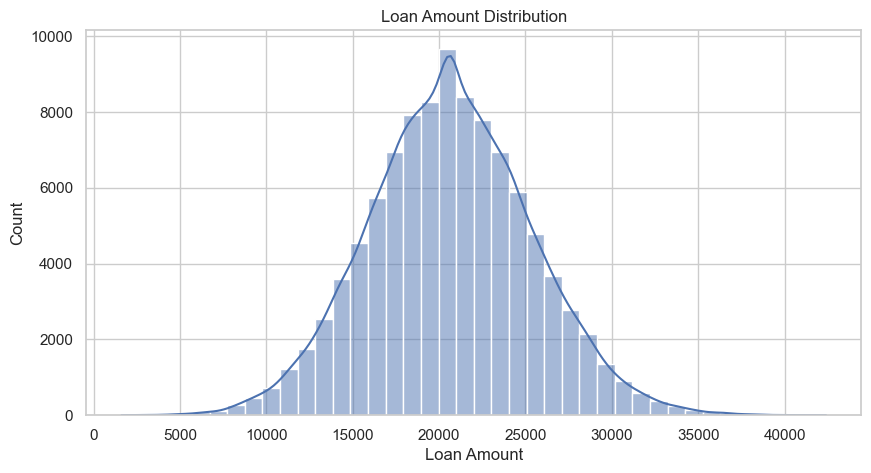

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df['loanamount'], bins=40, kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()


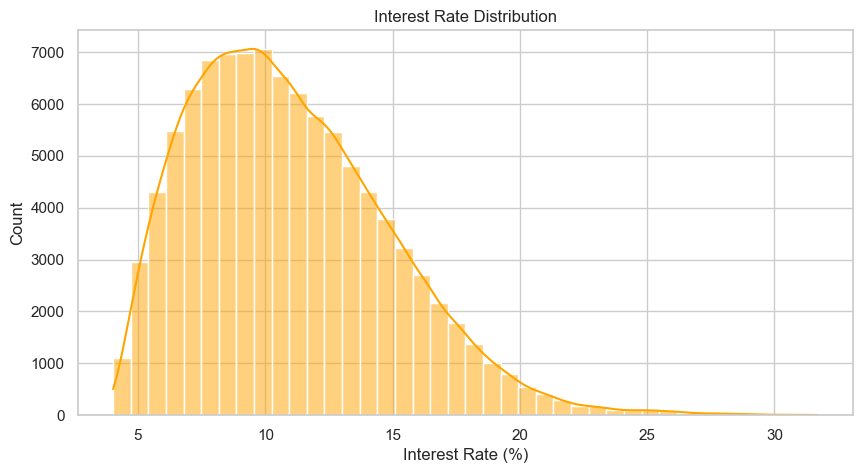

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df['interestrate'], bins=40, kde=True, color='orange')
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Count")
plt.show()


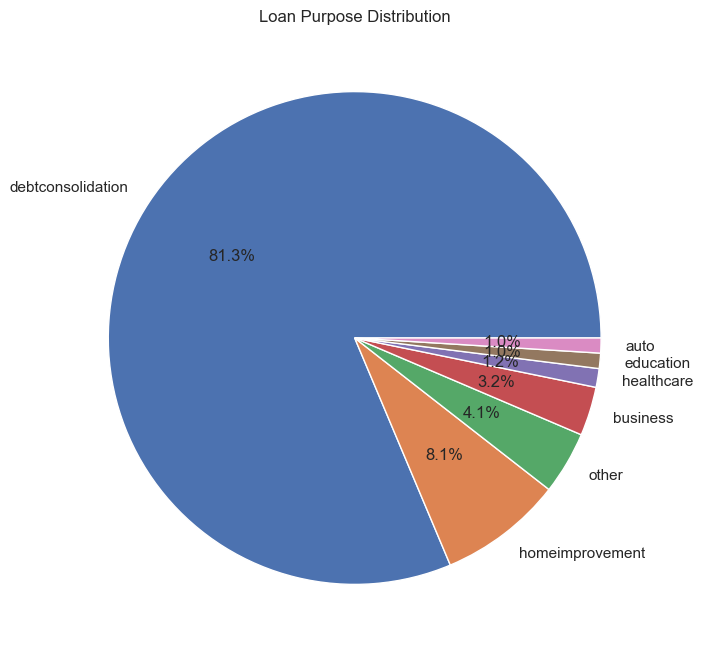

In [25]:
plt.figure(figsize=(8,8))
df['purpose'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Loan Purpose Distribution")
plt.ylabel("")
plt.show()


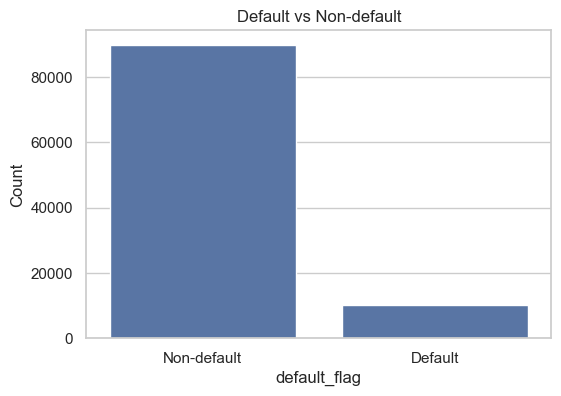

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['default_flag'])
plt.title("Default vs Non-default")
plt.xticks([0,1], ["Non-default", "Default"])
plt.ylabel("Count")
plt.show()


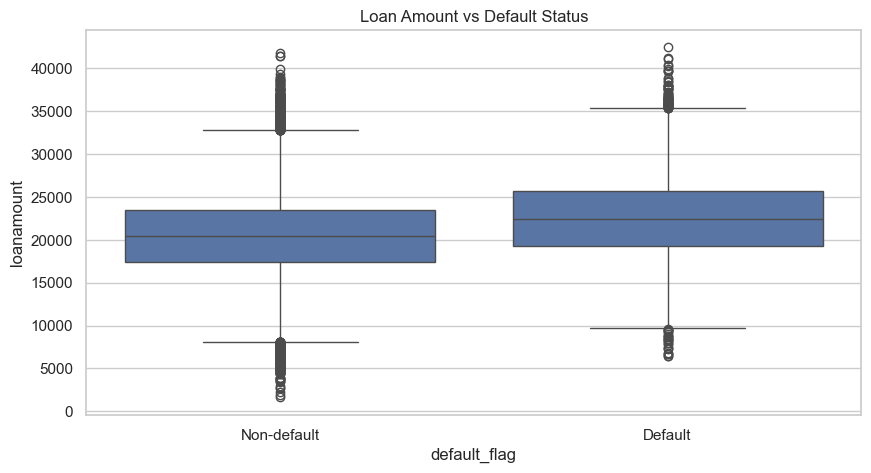

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='default_flag', y='loanamount', data=df)
plt.title("Loan Amount vs Default Status")
plt.xticks([0,1], ["Non-default", "Default"])
plt.show()


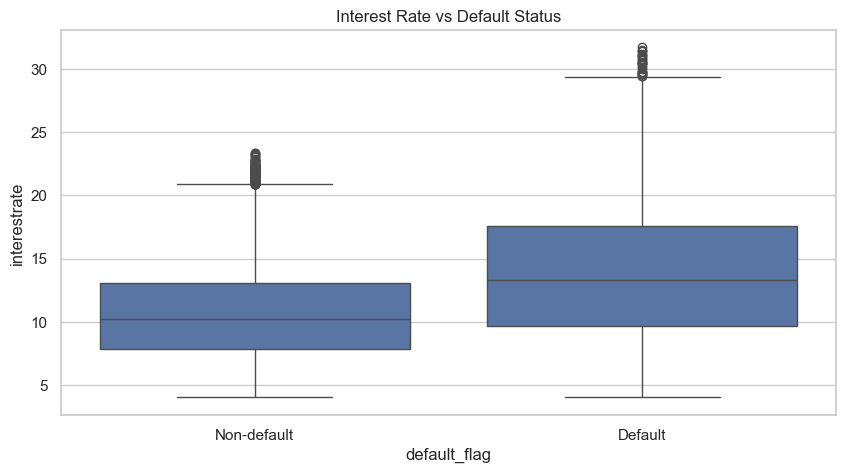

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='default_flag', y='interestrate', data=df)
plt.title("Interest Rate vs Default Status")
plt.xticks([0,1], ["Non-default", "Default"])
plt.show()


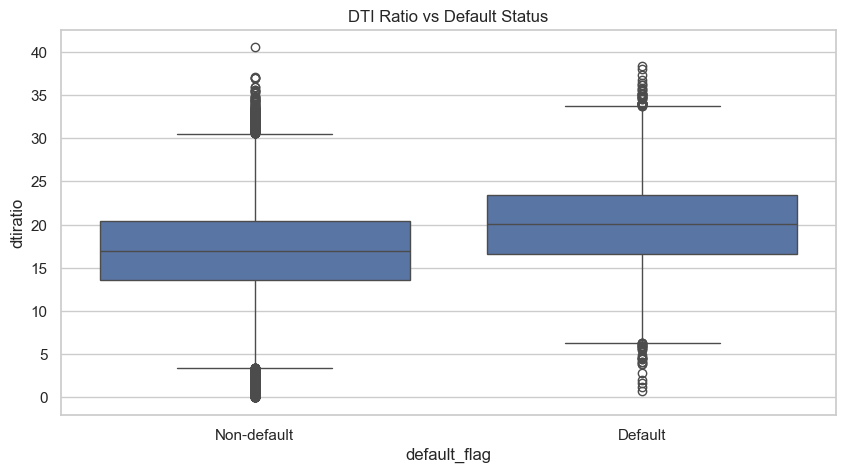

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='default_flag', y='dtiratio', data=df)
plt.title("DTI Ratio vs Default Status")
plt.xticks([0,1], ["Non-default", "Default"])
plt.show()


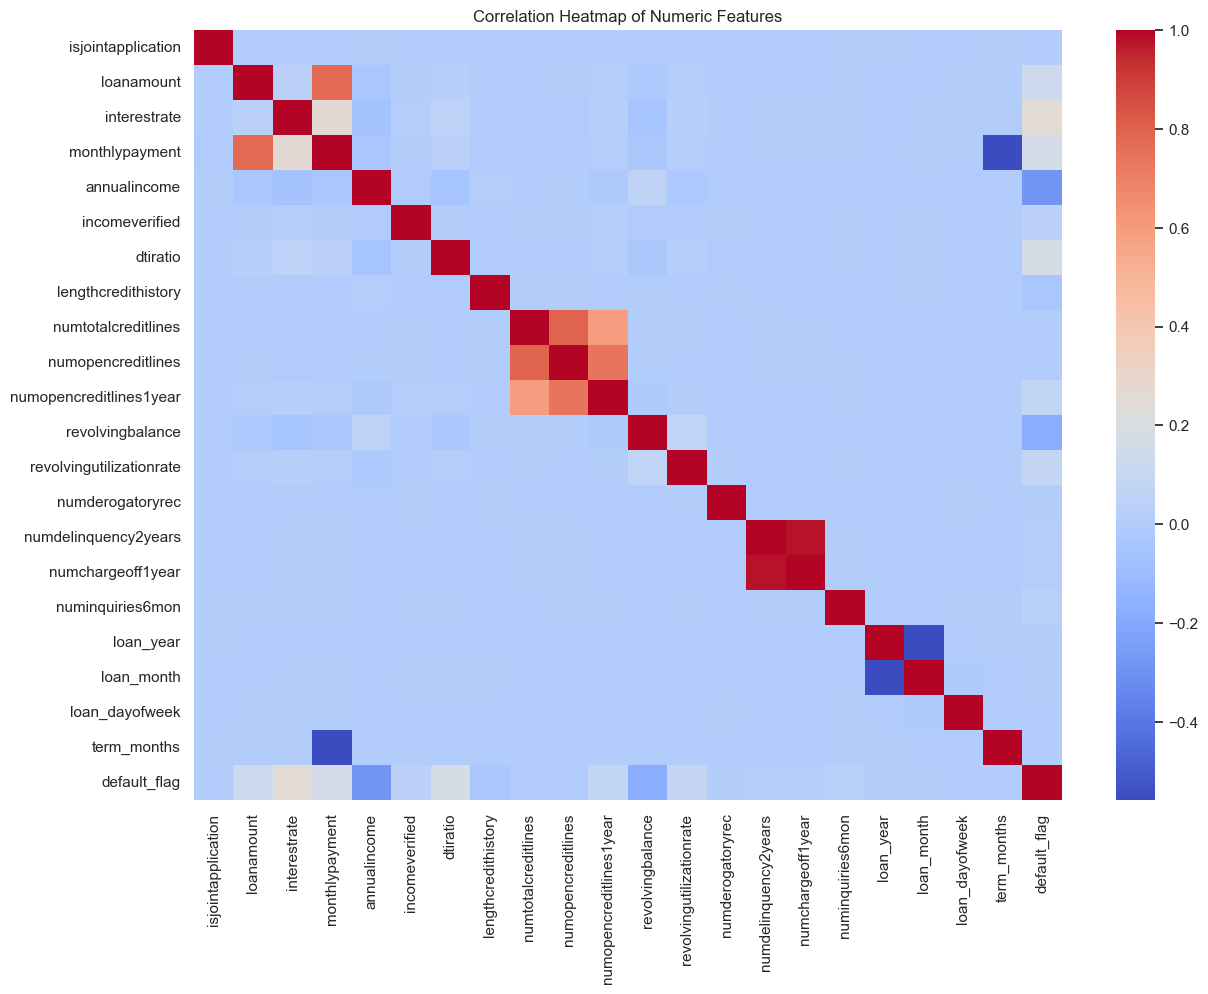

In [30]:
plt.figure(figsize=(14,10))
numeric_df = df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()

sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


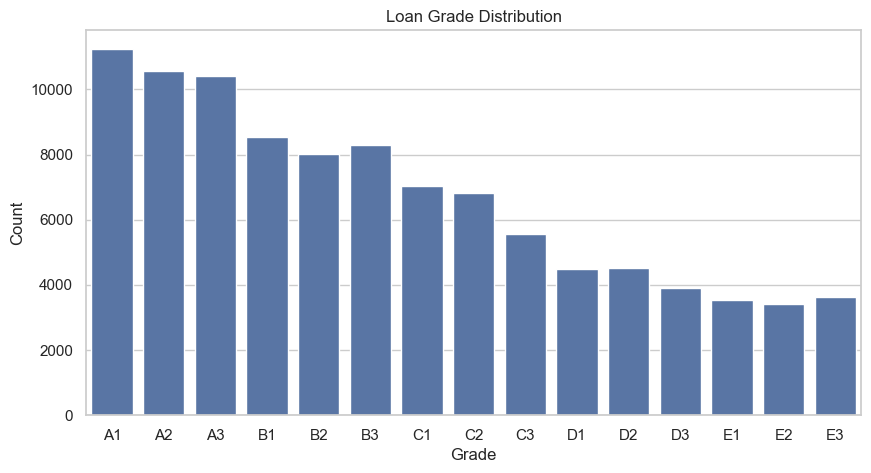

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade', data=df, order=sorted(df['grade'].unique()))
plt.title("Loan Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()


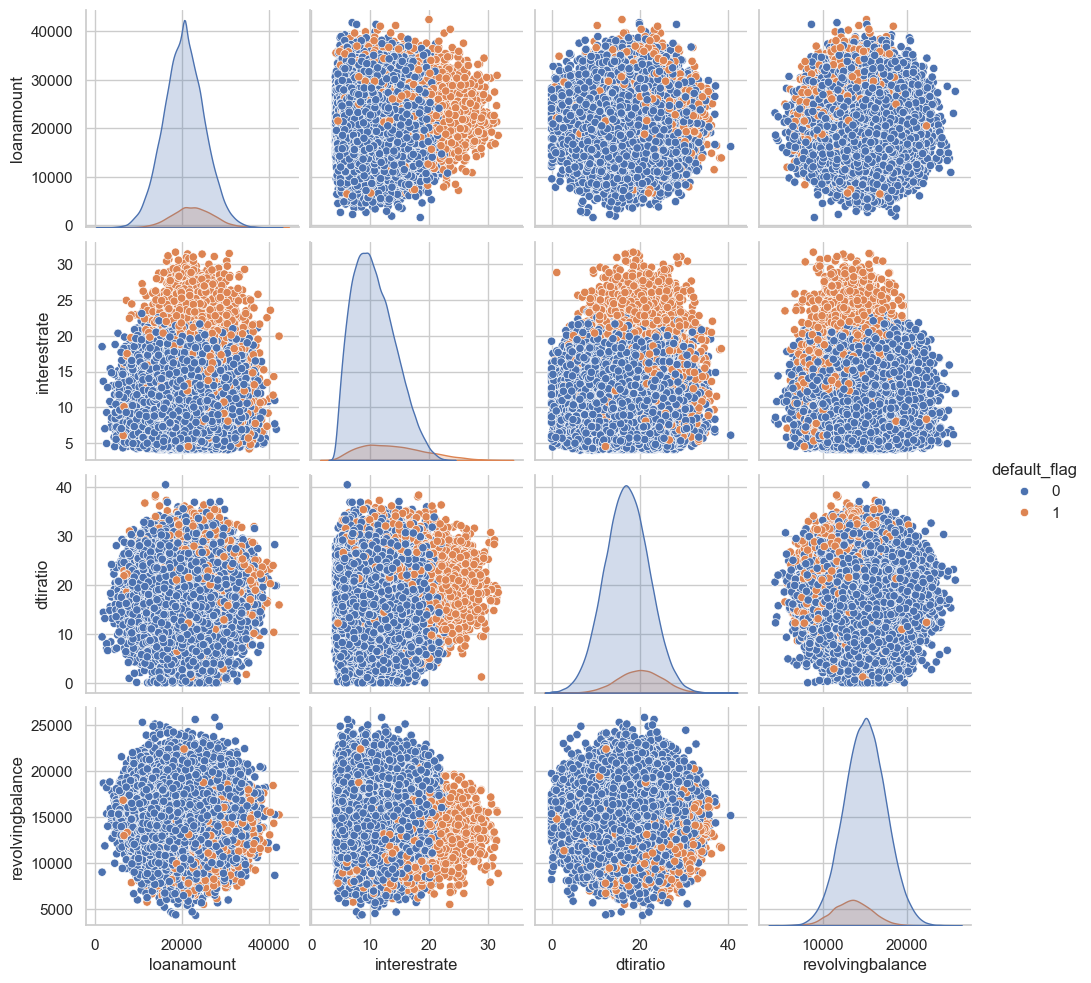

In [32]:
sns.pairplot(df[['loanamount','interestrate','dtiratio','revolvingbalance','default_flag']], 
             hue='default_flag')
plt.show()


In [33]:
import pandas as pd
import sqlite3

# Load raw CSV
raw_df = pd.read_csv("loan_master.csv")

# Connect to SQLite DB
conn = sqlite3.connect("creditpathai.db")

# Store raw data
raw_df.to_sql(
    name="loan_data_raw",
    con=conn,
    if_exists="replace",
    index=False
)

# Verify ingestion
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM loan_data_raw")
print("Raw data rows:", cursor.fetchone()[0])

conn.close()


Raw data rows: 100000


In [34]:
import pandas as pd
import sqlite3

# Load processed CSV
final_df = pd.read_csv("data/processed/loan_master_final.csv")

# Connect to SQLite DB
conn = sqlite3.connect("creditpathai.db")

# Store final data
final_df.to_sql(
    name="loan_data_final",
    con=conn,
    if_exists="replace",
    index=False
)

# Verify ingestion
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM loan_data_final")
print("Final data rows:", cursor.fetchone()[0])

conn.close()


Final data rows: 100000


In [35]:
conn = sqlite3.connect("creditpathai.db")
cursor = conn.cursor()

cursor.execute("""
SELECT name FROM sqlite_master 
WHERE type='table';
""")

print("Tables in database:")
for table in cursor.fetchall():
    print(table[0])

conn.close()


Tables in database:
loan_data
loan_data_raw
loan_data_final
